# Determiner la distribution d'un réseau d'eau

In [27]:
import numpy as np

# Import des données du problème
from TP_OC.Python.Probleme_R import n, m, mr, md, orig, dest, absn, ordn, r, pr, fd
from TP_OC.Python.Structures_N import Ar, Ad, AdT, AdI, AdC, B, q0

On remarque que dans la fonction à minimser, $q_c$ n'apparait que dans des structures de la forme $q^{(0)}+Bq_c$ donc on pose $ Q = q^{(0)} + Bq_c$

In [28]:
def F(q_c):
    Q = q0 + np.dot(B, q_c)
    return((1/3)* (np.dot(Q, r * Q * abs(Q)) + np.dot(pr, np.dot(Ar, Q))))

En calculant F(x+h) au second ordre en h, on obtient le gradient et la hessienne de F

In [105]:
def grad_F(q_c):
    """
    Peut-être rajouter un terme à multiplier pour la règle de la chaîne
    """
    Q = q0 + np.dot(B, q_c)
    return np.dot(np.transpose(B), r*Q*abs(Q)) + np.dot(np.transpose(np.dot(Ar, B)), pr)

In [106]:
def oraclePG(q_c, ind=4):
    if ind == 2 :
        return F(q_c)
    elif ind == 3 :
        return grad_F(q_c)
    elif ind == 4:
        return F(q_c), grad_F(q_c)

On test sur l'oracle.


Iteration : 4187
Temps CPU : 0.13647155600000005
Critere optimal : 7.936228345753166
Norme du gradient : 9.974936210514598e-07


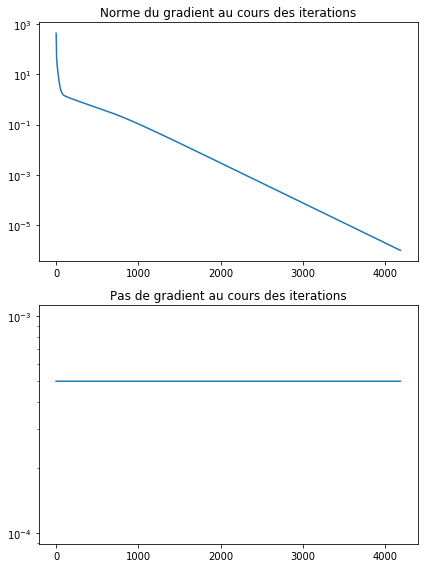

(7.936228345753166,
 array([-9.97488707e-07,  2.10134787e-09, -1.49918744e-10,  2.89155366e-11,
        -2.11820428e-09, -1.84091853e-10, -6.67473188e-10, -9.06141828e-11,
         6.24779339e-10]),
 array([ 0.31167056, -0.01749637,  0.16279675,  0.4306519 ,  0.03817885,
        -0.01562977, -0.15147633, -0.11908204,  0.18404951]))

In [107]:
from TP_OC.Python.Gradient_F import Gradient_F
Gradient_F(oraclePG, np.zeros(n - md))

In [85]:
def Hess_F(q_c):
    Q = q0 + np.dot(B, q_c)
    return 2 * np.dot(
                    np.dot(
                        np.transpose(B),
                        np.diag(np.diag(r * abs(Q))),
                    B)
    )

In [80]:
def oraclePH(q_c, ind=7):
    if ind == 2:
        return F(q_c)
    elif ind == 3:
        return grad_F(q_c)
    elif ind == 4:
        return F(q_c), grad_F(q_c)
    elif ind == 5:
        return Hess_F(q_c)
    elif ind == 6:
        return grad_F(q_c), Hess_F(q_c)
    elif ind == 7:
        return F(q_c), grad_F(q_c), Hess_F(q_c)

In [81]:
from TP_OC.Python.Newton_F import Newton_F
Newton_F(oraclePH, np.zeros(n - md))

ValueError: output array is not acceptable (must have the right datatype, number of dimensions, and be a C-Array)